## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

In [4]:
df.dtypes
#just wanted to check the type of dataset

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

c. The number of unique users in the dataset.

In [5]:
df.nunique() 

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [6]:
df.describe() #wanted to check the distribution of the data

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


d. The proportion of users converted.

In [7]:
#because the df(converdeted) are having two values (0 & 1), the proportion will be calculated for each

In [8]:
user_convert_1 = df.query('converted == 1')['user_id'].shape[0]
user_convert_1

35237

In [9]:
user_convert_0 = df.query('converted == 0')['user_id'].shape[0]
user_convert_0

259241

In [10]:
p_user_convert1 = user_convert_1/df.shape[0]
print ('The Proportion of user converter for 1 = ', p_user_convert1)

The Proportion of user converter for 1 =  0.11965919355605512


In [11]:
p_user_convert0 = user_convert_0/df.shape[0]
print ('The Proportion of user converter for 0 = ', p_user_convert0)

The Proportion of user converter for 0 =  0.8803408064439449


e. The number of times the `new_page` and `treatment` don't line up.

**Reference**: https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

In [12]:
#if im not mistaken (dont line up means (!=))
treat_newpage = df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page')) == False].shape[0]
treat_newpage

290585

f. Do any of the rows have missing values?

In [13]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
#so gonna take the previous function for (e) and put it in new dataframe to drop...
#... the 3893 rows that is not matching
df2 = df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page')) == False]
df2.shape[0]

290585

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [16]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

#**reference for showing the duplicated row**: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=DataFrame.-,duplicated(),or%20some%20specific%20columns%20i.e.&text=It%20returns%20a%20Boolean%20Series%20with%20True%20value%20for%20each%20duplicated%20row.

In [ ]:
df2[df2.duplicated('user_id')]

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

**Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates

In [20]:
#dropping the above row
df2 = df2.drop_duplicates(subset=['user_id'], keep='last')

In [21]:
#checking for duplication
df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
#its same step as part (d) and can get it from mean() function because the (describe() function)...
#...give similar values of mean one as the proportion one.
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
#need to see the df again
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [24]:
#this time will extract the control from group by converted column
p_control_conv = df2.query('group == "control"')['converted'].mean()

print ('The Proportion of control at group for converted = ', p_control_conv)

The Proportion of control at group for converted =  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
#same as above but will use the treatment one
p_treat_conv = df2.query('group == "treatment"')['converted'].mean()

print ('The Proportion of treatment at group for converted = ', p_treat_conv)

The Proportion of treatment at group for converted =  0.11880806551510564


d. What is the probability that an individual received the new page?

In [26]:
#this time will use the column (landing page)
p_new_page = df2.query('landing_page == "new_page"')['converted'].shape[0]
p_new_page = p_new_page/df2.shape[0]

print ('The Proportion of new_page at landing_page for converted = ', p_new_page)

The Proportion of new_page at landing_page for converted =  0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>**The probability of the conversion was 11.96% while the probability of control depending on individual conversion was 12.03% , the control one is not showing significant increment compared to the conversion values**

>**and the treatment type from group that depending on the individual conversion was slightly below the conversion one as it was 11.88%**

>**so recapping to the porbability values, there is no sufficient evidence to say it were leading to more conversions**.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## **$H_{o}$: $P_{old}$ = $P_{new}$**

## **$H_{1}$: $P_{old}$ < $P_{new}$**

or

## **$H_{o}$: $P_{old}$ - $P_{new}$ = $Zero$**

## **$H_{1}$: $P_{new}$ - $P_{old}$ > $Zero$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [27]:
#its same steps as (4-a-).. so I'm gonna the propability of df2-converted and...
#... gonna put it in new variabile
p_new_null = df2['converted'].mean()
p_new_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
#and this question's answer is in the (1-d-) so Im gonna put it under new variabile
p_old_null = df.query('converted == 1')['user_id'].shape[0]
p_old_null = p_old_null/df.shape[0]
p_old_null

0.11965919355605512

**Thus, the P-old and P-new are equal**

c. What is $n_{new}$?

In [29]:
#the N-new will be calcualted for the the df2 - loading page especifically (new-page)
#this time it will be in general and not depending on another columns
n_new_page = df2.query('landing_page == "new_page"').shape[0]
n_new_page

145310

d. What is $n_{old}$?

In [30]:
#same as above but the N-old will be for (oldd-page)
n_old_page = df2.query('landing_page == "old_page"').shape[0]
n_old_page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
#in this case im gonna use the binomial and plt it in hist-gram using sns
import seaborn as sns

**Reference**: https://www.w3schools.com/python/numpy_random_binomial.asp

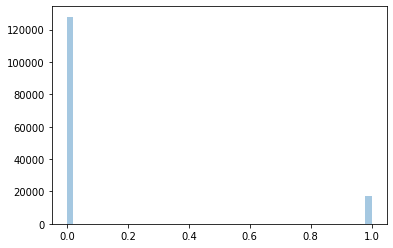

In [32]:
#will use (np.random) for binomial function
new_page_converted = np.random.binomial(1, p_new_null, n_new_page)

sns.distplot(new_page_converted, hist=True, kde=False, label='binomial')
plt.show()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

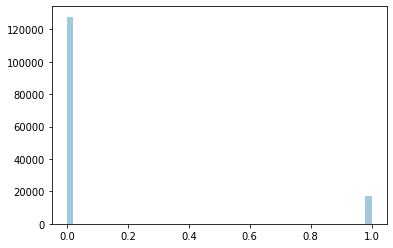

In [33]:
#same as above with using the old P & N values
old_page_converted = np.random.binomial(1, p_old_null, n_old_page)

sns.distplot(old_page_converted, hist=True, kde=False, label='binomial')
plt.show()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
#the H1 result will be for the Porpotion of N-old-converted and N-new-converted
h1_page_converted = (new_page_converted.mean()) - (old_page_converted.mean())
h1_page_converted

-0.0004907754316282736

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

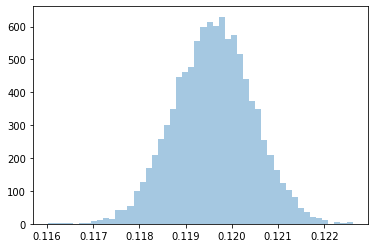

In [35]:
#the size will be 10k
new_page_converted1 = (np.random.binomial(n_new_page, p_new_null, size=10000))/n_new_page

sns.distplot(new_page_converted1, hist=True, kde=False, label='binomial')
plt.show()

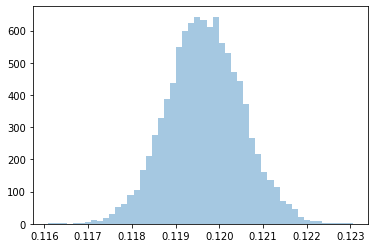

In [36]:
old_page_converted1 = (np.random.binomial(n_old_page, p_old_null, size=10000))/n_old_page

sns.distplot(old_page_converted1, hist=True, kde=False, label='binomial')
plt.show()

In [37]:
p_diffs = new_page_converted1 - old_page_converted1
p_diffs.mean()

-6.335724646870448e-05

In [38]:
print(p_diffs)

[ 0.00084442  0.00063799 -0.00095872 ...  0.0002801  -0.00050448
  0.00084466]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

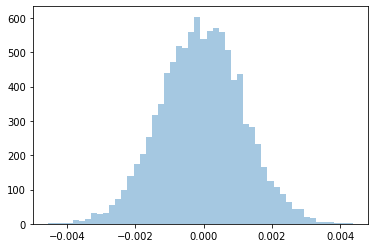

In [39]:
sns.distplot(p_diffs, hist=True, kde=False)
plt.show()

 > the hist-plot gave binomial waveform as the previous two above with slightly different at the high points

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


> in above steps we tried to get the p-diff according to the old-page & new-page. to get the actual difference the the column (group) will be used from question (4 -b &c-)


In [41]:
act_diff = p_treat_conv - p_control_conv
act_diff

-0.0015782389853555567

In [42]:
len(p_diffs)

10000

In [43]:
#creat df for the p-diff
columns = [f'p_diffs' for num in range(1)]
index = [f'{num}' for num in range(10000)]
p_diff_df = pd.DataFrame(p_diffs, columns=columns, index=index)
p_diff_df

,p_diffs
0,0.000844
1,0.000638
2,-0.000959
3,-0.000566
4,-0.002611
...,...
9995,-0.000408
9996,-0.001551
9997,0.000280
9998,-0.000504


In [44]:
p_diff_df.query('p_diffs' '>@ act_diff').shape[0]/p_diff_df.shape[0]

0.8964

In [45]:
p_diff_df.query('p_diffs' '<@ act_diff').shape[0]/p_diff_df.shape[0]

0.1036

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**p_diffs = -6.954321732963822e-05 & act_diff = -0.0015782389853555567.**

>**as the mean value for both (p_diffs & act_diffs) were negative and the proportion of them together shown huge value especially (p_diffs > act_diff) gave value of 89.5%**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [46]:
import statsmodels.api as sm

In [47]:
#porportion with converted
convert_old = df2.query('landing_page == "old_page"')['converted'].mean() 
convert_new = df2.query('landing_page == "new_page"')['converted'].mean()

In [48]:
#in general
n_old = df2.query('landing_page == "old_page"').shape[0] 
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [49]:
sm_ztest = sm.stats.proportions_ztest

In [50]:
tast_statistic, p_value = sm_ztest([convert_old, convert_new], [n_old, n_new])

print (' the Test Statistic = ', tast_statistic)
print (' the P Value = ', p_value)

 the Test Statistic =  0.0032875796753531767
 the P Value =  0.9973768956597913


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-score = 0.003288**
**P-value = 0.997378**

>**the Z Score mean that the mean devation of the conversion rate are almost zero while the probability under the null hypothesis are almost 100%**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression as it depend on the categorical variabile in predication.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [52]:
df2['intercept'] = 1
df2[['treatment', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('treatment', axis=1)
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [53]:
log_statmodel = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()
log_statmodel

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
log_statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        23:03:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>**the p-value associated with ab_page are: P>|z| = 0.190... and in part two P-value = 0.997378**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [55]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [56]:
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [57]:
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1


In [58]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [59]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

In [60]:
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

>> PS: I did try to do linear model on the three countries but for some reason it gave me warning and NaN values on summary function

In [61]:
### Fit Your Linear Model And Obtain the Results
log_statmodel_country = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA']]).fit()
log_statmodel_country

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [62]:
log_statmodel_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:               2.323e-05
Time:                        23:04:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0